<a href="https://colab.research.google.com/github/MarcelaMonteiroMontenegroGallo/Python/blob/master/exercise_twitter_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install -q numpy scipy pandas matplotlib twython

In [0]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from twython import Twython
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [0]:
# Credentials
APP_KEY = 'B6cZTTHoeMr96AFfOsbVM2lGG'
APP_SECRET = 'QhGt5p4TsGVK8tOds1fWc7hEDIFfrgnTW94fenpl1WneWLWqfz'
OAUTH_TOKEN = '167813147-tP4vOpAZFlcfRLlqXWMfRqcBW3yvjNpzRAborOUu'
OAUTH_TOKEN_SECRET = '8UshaZNMspgdN2kRuSlkPbBJfYdu3UDzOzZt0R1F8JoU7'

In [0]:
# Conn on twitter
twitter = Twython(APP_KEY, APP_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

twitter.verify_credentials()
twitter.get_home_timeline()

In [0]:
# Query on twitter
query = {
          'q': '#trump',
          'count': 100,
          'lang': 'en',
          'result_type': 'mixed'
        }

result = twitter.search(**query)
print(result)

In [0]:
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': []}  
for status in result['statuses']:  
    dict_['user'].append(status['user']['screen_name'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['favorite_count'].append(status['favorite_count'])

# Structure data in a pandas DataFrame for easier manipulation
df = pd.DataFrame(dict_)  

print(df.shape)

df.sort_values(by='favorite_count')

In [0]:
# Creating TDIDF Matrix
count_vect = CountVectorizer()

X_TF = count_vect.fit_transform(df['text'])

tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X_TF)
print(type(X))
print(X.shape)
print(X)


In [0]:
# Trainning cluster 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [0]:
# Verify results old fashion way
print(df.iloc[2]['text'])

for index, row in df.iterrows():
   print(str(index) + ':' + row['text'])
    
labels = kmeans.labels_
centers = kmeans.cluster_centers_

print(labels)
print(centers)

100


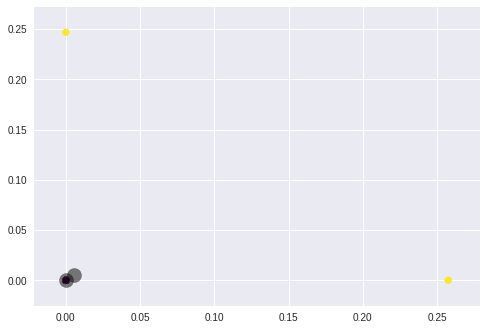

In [0]:
import matplotlib.pyplot as plt

X_array = X.toarray()
Y = kmeans.predict(X)

print(len(X_array[:,0]))

plt.scatter(X_array[:, 0], X_array[:, 1], c=Y, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
